# Business Understanding

### Modelo de Regressão para Marketing

Uma empresa está investindo mensalmente em plataformas de publicidade online, como Youtube, Facebook e newspaper, para a prospecção de leads (pessoas interessadas em seus produtos). A fim de acompanhar o desempenho desses investimentos, a empresa registra todos os gastos com publicidade e todos os retornos de vendas gerados a partir desses investimentos. Para entender melhor a relação entre as variáveis presentes nesses registros e identificar os fatores que mais impactam na geração de leads, a empresa solicitou a análise de um especialista em dados. Além disso, a empresa busca criar um modelo de predição de valores para estimar o retorno de vendas que pode ser gerado a partir de um determinado investimento em publicidade.

# Data Understanding

## Setup

In [334]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale, power_transform

## Data

In [335]:
# Carregando os dados
df = pd.read_csv('C:\DNC\Python\Prova 1\MKT.csv')
df

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88
...,...,...,...,...
166,45.84,4.44,16.56,9.12
167,113.04,5.88,9.72,11.64
168,212.40,11.16,7.68,15.36
169,340.32,50.40,79.44,30.60


In [336]:
# Identificando os tipos de dados e valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [337]:
# Verificando valores únicos
df.nunique()

youtube      165
facebook     145
newspaper    148
sales        112
dtype: int64

In [338]:
# Descricão estatística dos dados
df.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


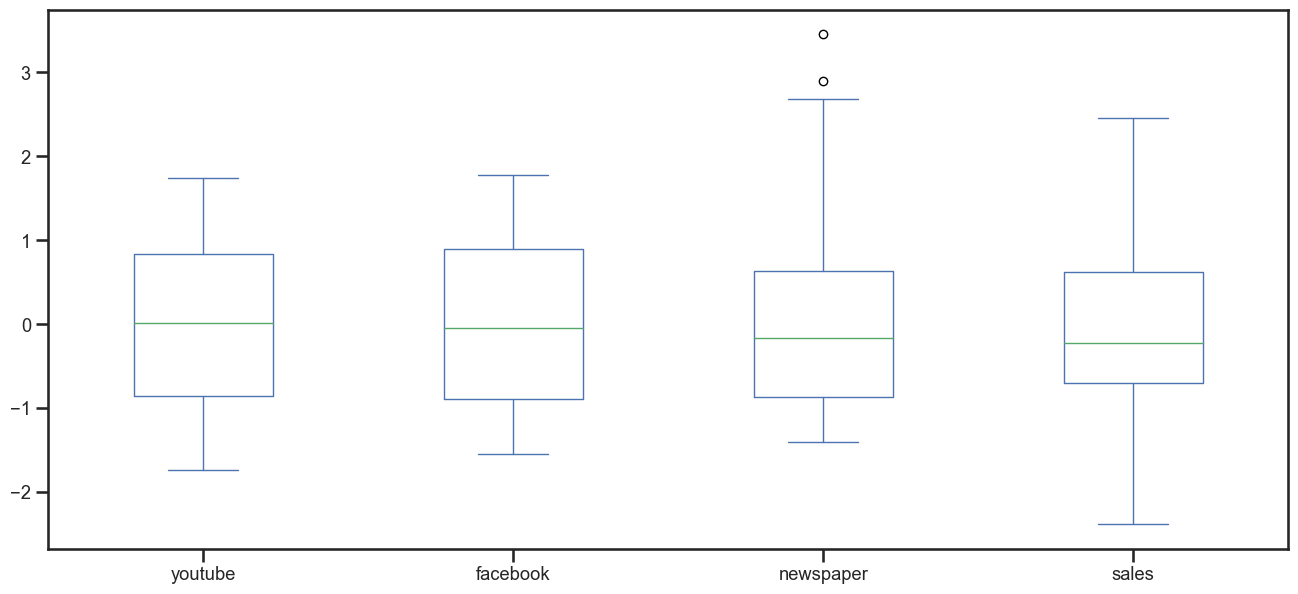

In [339]:
# Identificando Outliers
df.apply(scale).plot.box(figsize=(16,7));

# Data Preparation

<Axes: title={'center': 'Without Outliers'}>

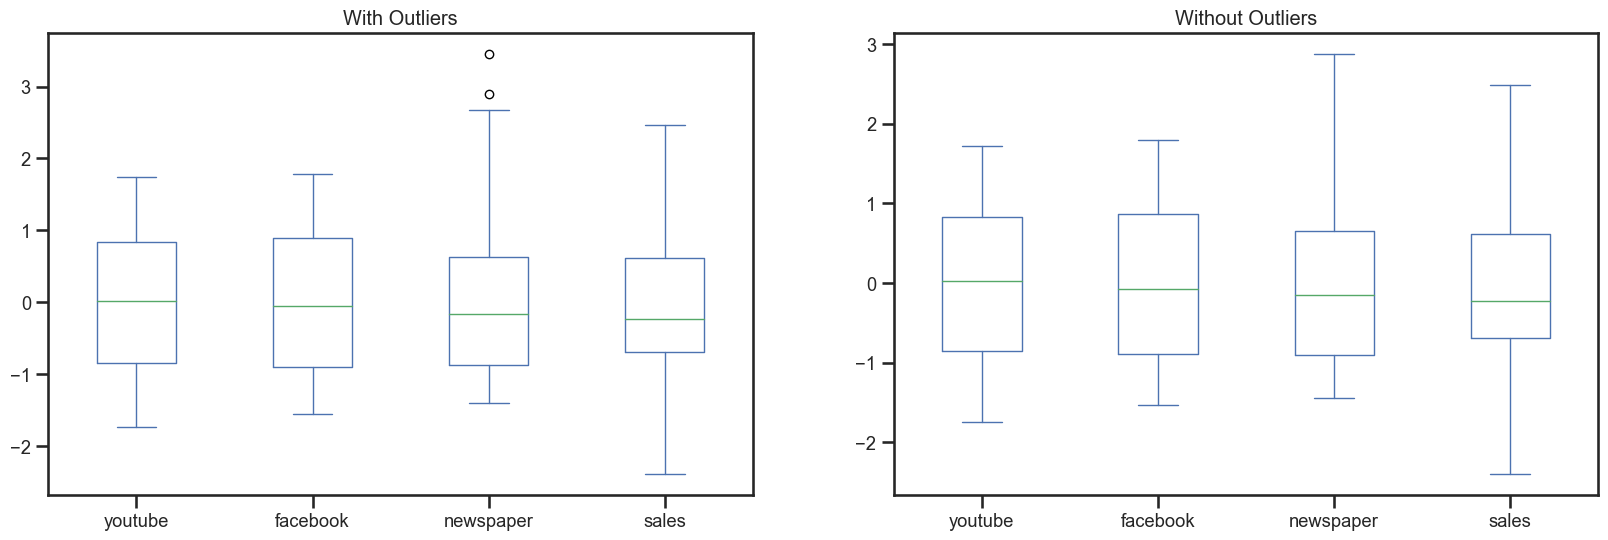

In [340]:
# Tratando os outliers da categoria newspaper com o intervalo interquartil
def is_outlier(array,extreme=False):
    q1, q3 = np.quantile(array, [.25, .75])
    iqr = q3-q1

    factor = 3. if extreme else 1.5
    upper_outlier = q3 + factor * iqr
    lower_outlier = q1 - factor * iqr

    return (array < lower_outlier) | (array > upper_outlier)

df_original = df.copy()
df = df[~df.apply(is_outlier).any(axis=1)]

fig,axes = plt.subplots(ncols=2, figsize=(20,6))

df_original.apply(scale).plot.box(ax=axes[0], title='With Outliers')
df.apply(scale).plot.box(ax=axes[1], title='Without Outliers')


In [341]:
df.describe()

,youtube,facebook,newspaper,sales
count,169.000000,169.000000,169.000000,169.000000
mean,177.903195,27.431006,34.305799,16.892308
std,101.414376,17.874627,23.492735,6.268315
min,0.840000,0.000000,0.360000,1.920000
25%,91.560000,11.520000,13.200000,12.600000
50%,179.760000,26.040000,30.720000,15.480000
75%,262.200000,42.960000,49.680000,20.760000
max,352.320000,59.520000,101.760000,32.400000


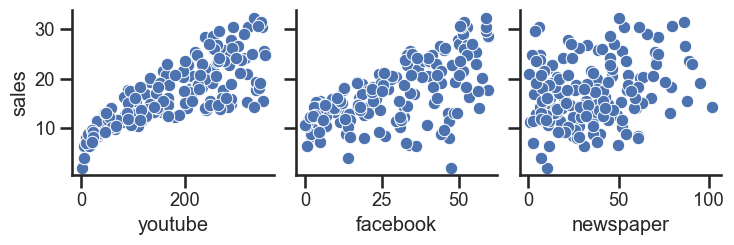

In [342]:
sns.pairplot(df, x_vars=['youtube', 'facebook', 'newspaper'], y_vars="sales");

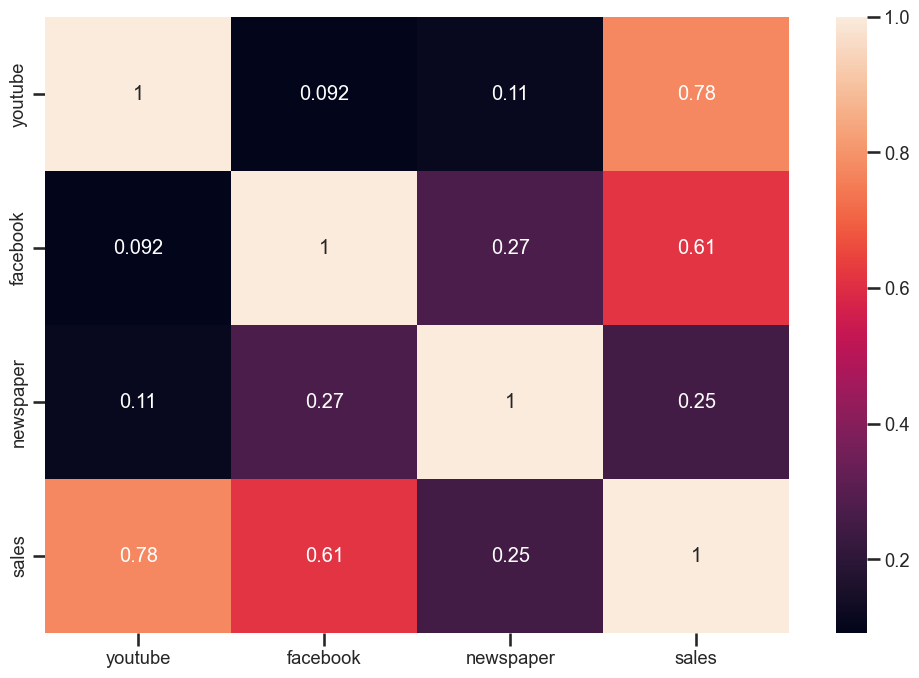

In [343]:
# Correlacão dos dados
sns.heatmap(df.corr(), annot=True);

# Modeling

### Modelo de Regressão

In [344]:
# Definindo o target
y = df['sales']
X = df.drop(columns=['sales'])

In [345]:
# Parâmetros de treino / teste
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

In [346]:
lm = LinearRegression()

In [347]:
# Passando os parâmetros de treino
lm.fit(X_train, y_train)

LinearRegression()

In [348]:
# Realizando as predicões para teste
y_pred = lm.predict(X_test)

In [349]:
# Calculando o r²
r = r2_score(y_test, y_pred)
print('r² = ', r)

r² =  0.9019111289467798


In [350]:
X_test.shape

(34, 3)

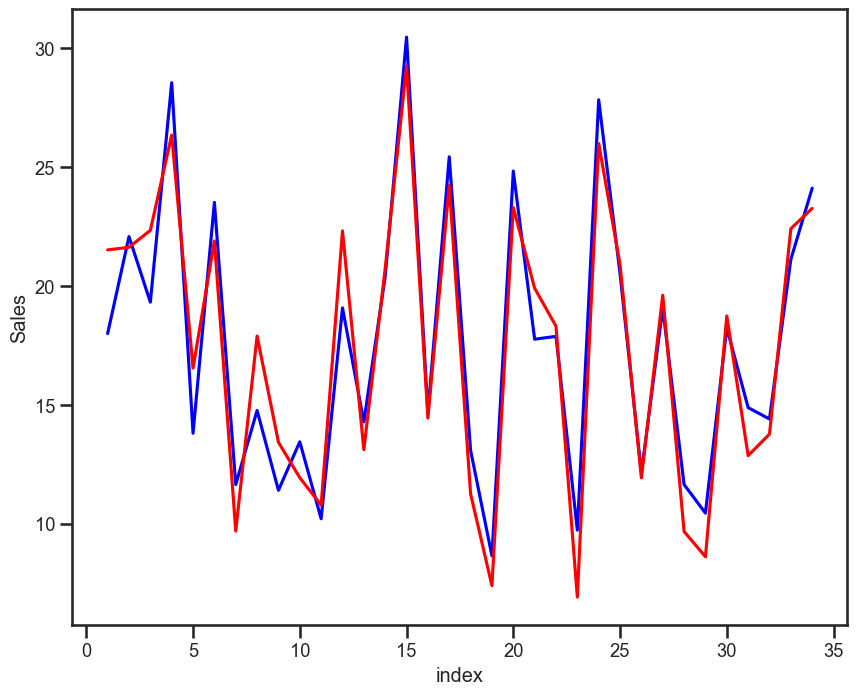

In [ ]:
# Comparando os valores preditos com os reais
c = [i for i in range(1, 35, 1)]
fig = plt.figure(figsize=(10,8))
plt.plot(c, y_test, color="blue")
plt.plot(c, y_pred, color = "red")
plt.xlabel("index");
plt.ylabel("Sales");